# Investigate if the order of averaging and filtering can be swapped

In [7]:
import xarray as xr
from dask.diagnostics import ProgressBar

In [8]:
daily_path = 'gs://leap-persistent/jbusecke/scale-aware-air-sea/v1.0.1/results/CM26_fluxes_filter_decomposed_native_appendix.zarr'
mean_path = 'gs://leap-persistent/jbusecke/scale-aware-air-sea/v1.0.1/results/CM26_fluxes_filter_decomposed_mean_appendix.zarr'

ds_daily = xr.open_dataset(daily_path, engine='zarr', chunks={})
ds_mean = xr.open_dataset(mean_path, engine='zarr', chunks={})

In [9]:
da_mean = ds_mean.sel(term='Q_star_star').to_array()
da_daily = ds_daily.sel(term='Q_star_star').to_array()

In [11]:
da_diff = da_daily.mean('time') - da_mean
with ProgressBar():
    da_diff = da_diff.load()
da_diff

[########################################] | 100% Completed | 116.39 s


<xarray.DataArray (variable: 2, algo: 5, yt_ocean: 2700, xt_ocean: 3600)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
  * algo      (algo) <U8 'ncar' 'ecmwf' 'coare3p0' 'coare3p6' 'andreas'
    area_t    (yt_ocean, xt_ocean) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    term      <U18 'Q_star_star'
  * variable  (variable) object 'qh' 'ql'
Dimensions without coordinates: yt_ocean, xt_ocean

In [12]:
da_diff_rel = da_diff/da_mean
da_diff_rel

<xarray.DataArray (variable: 2, algo: 5, yt_ocean: 2700, xt_ocean: 3600)>
dask.array<divide, shape=(2, 5, 2700, 3600), dtype=float32, chunksize=(1, 1, 2700, 3600), chunktype=numpy.ndarray>
Coordinates:
  * algo      (algo) <U8 'ncar' 'ecmwf' 'coare3p0' 'coare3p6' 'andreas'
    area_t    (yt_ocean, xt_ocean) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    term      <U18 'Q_star_star'
  * variable  (variable) object 'qh' 'ql'
Dimensions without coordinates: yt_ocean, xt_ocean

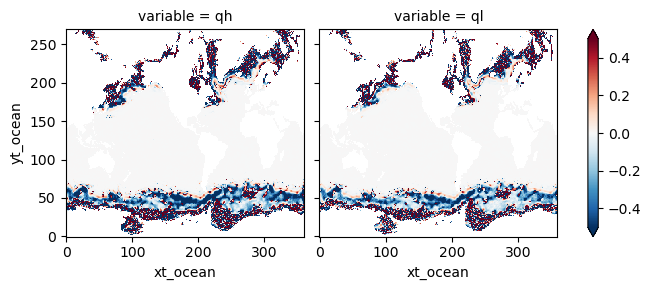

In [17]:
da_diff_rel.isel(xt_ocean=slice(0,None,10), yt_ocean=slice(0, None, 10), algo=0).plot(col='variable', vmax=0.5)

In [23]:
global_mean_daily = da_daily.mean('time').weighted(da_daily.area_t).mean(['xt_ocean', 'yt_ocean']).load()

In [24]:
global_mean_mean = da_mean.weighted(da_daily.area_t).mean(['xt_ocean', 'yt_ocean']).load()

In [25]:
global_mean_difference = (global_mean_daily/global_mean_mean)/global_mean_daily

In [28]:
abs(global_mean_difference).max()

<xarray.DataArray ()>
array(1.74889803)
Coordinates:
    term     <U18 'Q_star_star'

In [18]:
# TODO: Build a mask and compare the global average values with and without these values?